In [1]:
# Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("/content/Cars - Purchase Decision.csv")
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [ ]:
# Data Observation
# Dependent = Purchased
# Independent = Annual salary,Gender, Age

# continous = Age, annual salary
# category = Gender, Purchased

# Supervised learning

In [ ]:
# Data Cleaning

In [3]:
df.shape

(1000, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [5]:
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [6]:
df.tail()

,User ID,Gender,Age,AnnualSalary,Purchased
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1
999,687,Female,44,73500,0


In [7]:
# Statistical summary
df.describe(include='all')

,User ID,Gender,Age,AnnualSalary,Purchased
count,1000.000000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,516,NaN,NaN,NaN
mean,500.500000,NaN,40.106000,72689.000000,0.402000
std,288.819436,NaN,10.707073,34488.341867,0.490547
min,1.000000,NaN,18.000000,15000.000000,0.000000
25%,250.750000,NaN,32.000000,46375.000000,0.000000
50%,500.500000,NaN,40.000000,72000.000000,0.000000
75%,750.250000,NaN,48.000000,90000.000000,1.000000


In [ ]:
#Age and Annual Salary shows right skewed distribution.

#Age range of buyers is 18 to 63.

#Annual salary is ranging from 15000 to 152500.

#Average age and salary is 40 and 72689.



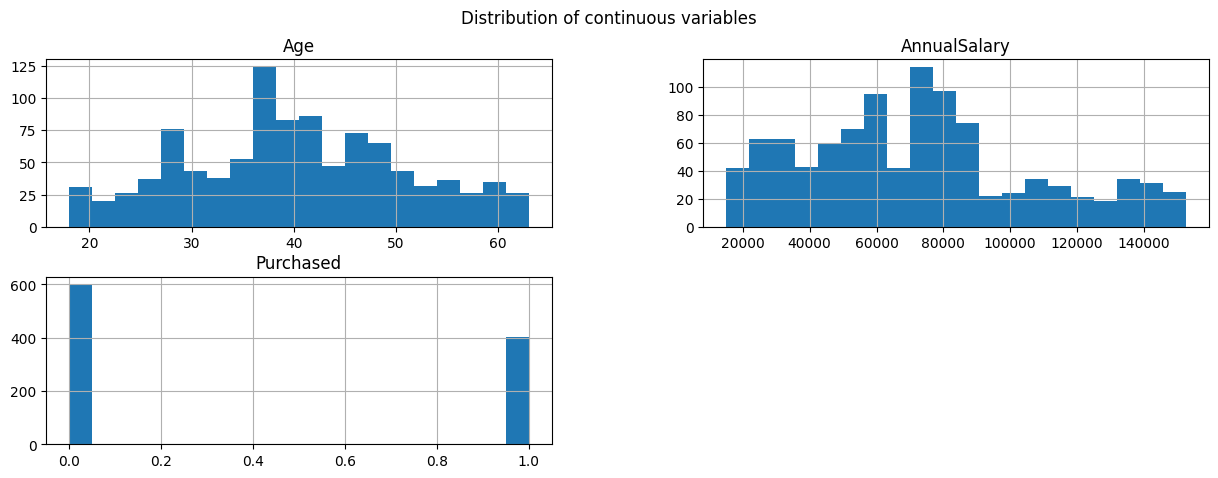

In [8]:
# Distribution of continuous variables
df.iloc[:,1:].hist(bins=20, figsize=(15,5))
plt.suptitle('Distribution of continuous variables')
plt.show()

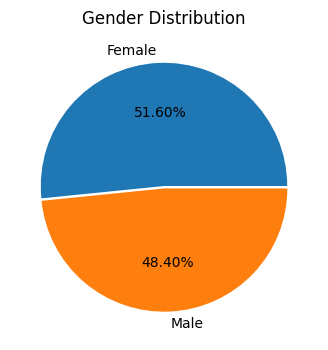

In [9]:
# Pie chart of Gender
plt.figure(figsize=(4,4))
plt.pie(df.Gender.value_counts(), labels=['Female', 'Male'], autopct='%.2f%%', explode=[0,0.02])
plt.title('Gender Distribution')
plt.show()


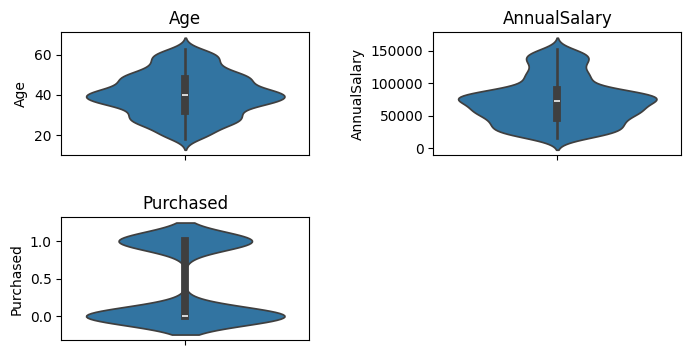

In [10]:
# Boxplot for outliers
plt.figure(figsize=(8,4))
plt.subplot(2,2,1)
sns.violinplot(df.Age)
plt.title('Age')

plt.subplot(2,2,2)
sns.violinplot(df.AnnualSalary)
plt.title('AnnualSalary')

plt.subplot(2,2,3)
sns.violinplot(df.Purchased)
plt.title('Purchased')

pl.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

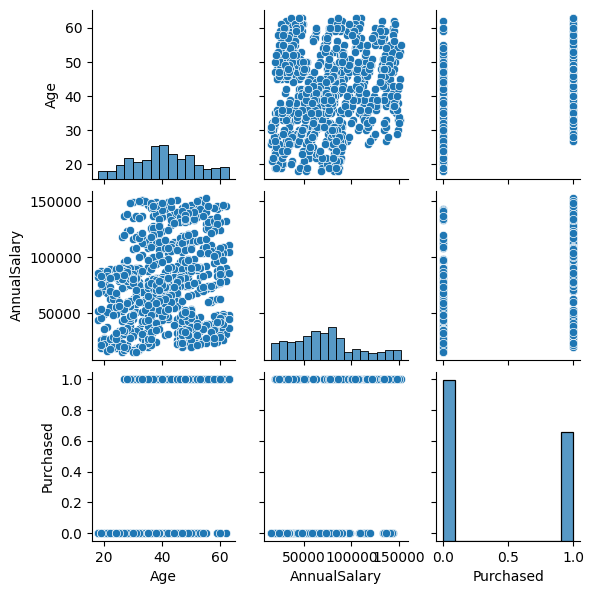

In [12]:
# Pairwise relationship
sns.pairplot(df.iloc[:,1:], height=2)
plt.show()

In [13]:
# Heatmap of correlation
plt.figure(figsize=(4,2))
sns.heatmap(df.iloc[:,1:].corr(), annot=True)
plt.show()

ValueError: could not convert string to float: 'Male'

<Figure size 400x200 with 0 Axes>

In [ ]:
#Here we can see that Age and Annual salary is showing positive correlation with purchase decision.

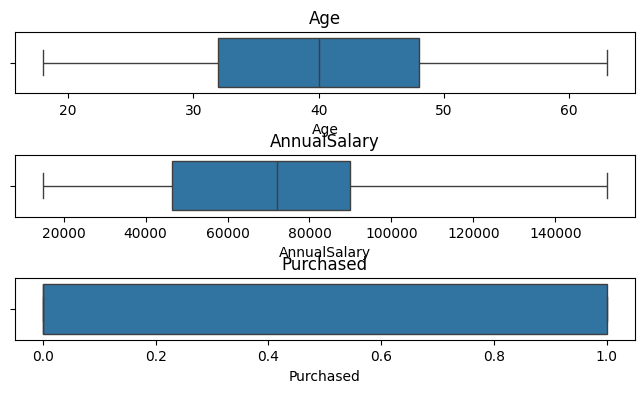

In [14]:
# Boxplot for outliers
plt.figure(figsize=(8,4))
plt.subplot(3,1,1)
sns.boxplot(df.Age, orient='h')
plt.title('Age')

plt.subplot(3,1,2)
sns.boxplot(df.AnnualSalary, orient='h')
plt.title('AnnualSalary')

plt.subplot(3,1,3)
sns.boxplot(df.Purchased, orient='h')
plt.title('Purchased')

pl.subplots_adjust(hspace=1)
plt.show()


In [ ]:
# It looks like we dont have any outliers in data.

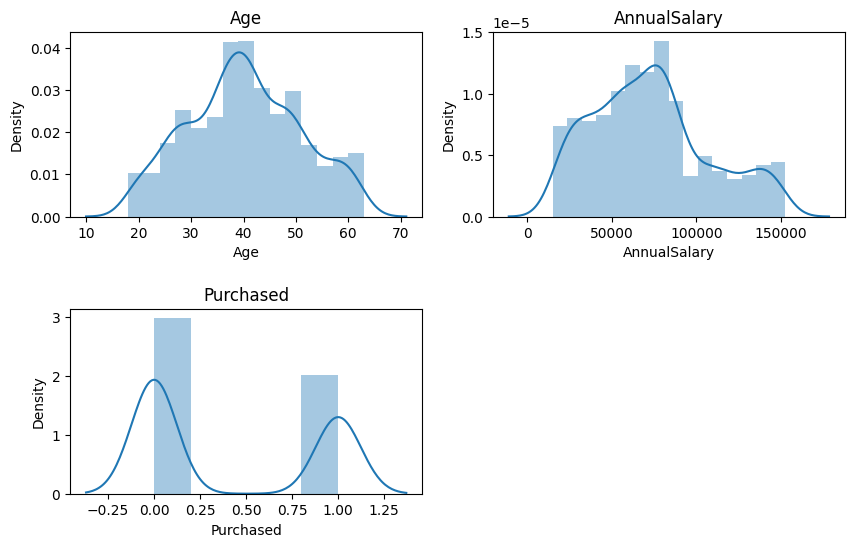

In [15]:
# Distribution of continuous variables
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.distplot(df.Age)
plt.title('Age')

plt.subplot(2,2,2)
sns.distplot(df.AnnualSalary)
plt.title('AnnualSalary')

plt.subplot(2,2,3)
sns.distplot(df.Purchased)
plt.title('Purchased')

pl.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
# Data Preprocessing

In [16]:
dataset = df.copy(deep=True)

In [17]:
# Categorical encoding
dummy = pd.get_dummies(df.Gender)
df = pd.concat([df,dummy], axis=1)  # Concating dummy variables to dataframe


In [18]:
df.drop('Gender', axis=1, inplace=True)  # Dropping Gender feature
df.head()

,User ID,Age,AnnualSalary,Purchased,Female,Male
0,385,35,20000,0,False,True
1,681,40,43500,0,False,True
2,353,49,74000,0,False,True
3,895,40,107500,1,False,True
4,661,25,79000,0,False,True


In [19]:
df.isnull().sum()

User ID         0
Age             0
AnnualSalary    0
Purchased       0
Female          0
Male            0
dtype: int64

In [20]:
df.isna().any()

User ID         False
Age             False
AnnualSalary    False
Purchased       False
Female          False
Male            False
dtype: bool

In [21]:
# Check for duplicated data
df.duplicated().any()


False

In [22]:
# Changing datatype of sex
df['Female'] = df.Female.astype('category')
df['Male'] = df.Male.astype('category')


In [23]:
# Checking outliers using z score
from scipy.stats import zscore
outlier = zscore(df.drop(['Female','Male','User ID'],axis=1))

In [24]:
outlier[abs(outlier)>3].any()

Age             False
AnnualSalary    False
Purchased       False
dtype: bool

In [26]:
df.Purchased.value_counts()

Purchased
0    598
1    402
Name: count, dtype: int64

In [27]:
# Seperating Independent and Dependent variables
x = df.drop(['Purchased','User ID'], axis=1)
y = df.Purchased


Feature Scaling

Scaling data is an important step in machine learning project as large data values can create biased results. Using feature scaling we try to bring all data points in similar scale so that comparison will be fair.

In [28]:
# Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x[['Age','AnnualSalary']] = scaler.fit_transform(x[['Age','AnnualSalary']])

Feature Selection

Feature selection is a process of identifying significant features. Here we will use Chi square for feature selection.




In [29]:
# Importing chi2_contingency from scipy.stats
from scipy.stats import chi2_contingency


In [30]:
chi_pvalue = []
for col in dataset.iloc[:,1:-1].columns:
    t1 = pd.crosstab(dataset[col],dataset.iloc[:,-1])
    pvalue = chi2_contingency(t1)[1]
    chi_pvalue.append(pvalue)

In [31]:
feat_imp = pd.DataFrame()   # Creating dataframe of feature importance
feat_imp['Features'] = dataset.iloc[:,1:-1].columns
feat_imp['Imp'] = chi_pvalue
feat_imp[feat_imp.Imp<0.05]

,Features,Imp
1,Age,3.849604e-68
2,AnnualSalary,7.054737e-20


Ho: No relation between two variables

Ha: There is a relation between two variables

Only Age and AnnualSalary found to be significant.




In [32]:
# Train test split
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x.drop(['Female','Male'],axis=1), y, test_size=0.2, random_state=42)


In [33]:
print('shape of train_x:',train_x.shape)
print('shape of train_y:',train_y.shape)
print('shape of test_x:',test_x.shape)
print('shape of test_y:',test_y.shape)


shape of train_x: (800, 2)
shape of train_y: (800,)
shape of test_x: (200, 2)
shape of test_y: (200,)


In [ ]:
# 1: Logistic Regression
# Logistic regression is a supervised learning algorithm. Here in this case we have to perform binary classification.



In [34]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)  # Training the model


LogisticRegression()

In [35]:
# Predicting on test data
log_reg_pred = log_reg.predict(test_x)
log_reg_pred_prob = log_reg.predict_proba(test_x)
log_reg_pred_prob = log_reg_pred_prob[:,1]

In [36]:
# Performance metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print('training score: %0.2f' %log_reg.score(train_x,train_y),'\n')
print('testing score: %0.2f' %log_reg.score(test_x,test_y),'\n')
print('Accuracy is: %0.2f'%accuracy_score(test_y, log_reg_pred),'\n')
print('confusion matrix: \n',confusion_matrix(test_y, log_reg_pred),'\n')
print('Classification report: \n',classification_report(test_y, log_reg_pred))


training score: 0.83 

testing score: 0.82 

Accuracy is: 0.82 

confusion matrix: 
 [[104   8]
 [ 28  60]] 

Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.93      0.85       112
           1       0.88      0.68      0.77        88

    accuracy                           0.82       200
   macro avg       0.84      0.81      0.81       200
weighted avg       0.83      0.82      0.82       200



Logistic regression model accuracy is 0.82.

F1 score is 0.77.

Model 2: Random Forest


In [37]:
# Building Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_x, train_y)

RandomForestClassifier()

In [38]:
# Predicting on test data
rf_pred = rf.predict(test_x)


In [39]:
# Performance metrics
print('training score: %0.2f' %rf.score(train_x,train_y),'\n')
print('testing score: %0.2f' %rf.score(test_x,test_y),'\n')
print('Accuracy is: %0.2f'%accuracy_score(test_y, rf_pred),'\n')
print('confusion matrix: \n',confusion_matrix(test_y, rf_pred),'\n')
print('Classification report: \n',classification_report(test_y, rf_pred))


training score: 0.99 

testing score: 0.90 

Accuracy is: 0.90 

confusion matrix: 
 [[106   6]
 [ 14  74]] 

Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       112
           1       0.93      0.84      0.88        88

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.90       200
weighted avg       0.90      0.90      0.90       200



Training score 0.99 is more than testing score 0.90 which shows overfitting.

To solve problem of overfitting we will try hypertuning using GridSearchCV.



In [41]:
# Hypertuning Random Forest model
from sklearn.model_selection import GridSearchCV, StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

tuned_paramaters = [{'criterion':['entropy', 'gini'],
                     'max_depth':[3,4,5,6],
                     'min_samples_split':[2,4,6,10],
                     'min_samples_leaf':[1,2,3,4,5]}]
                     #'max_leaf_nodes':list(range(1,10))

random_for = RandomForestClassifier()
rf_cv = GridSearchCV(random_for,
                     param_grid=tuned_paramaters,
                     cv=kfold,
                     verbose=1,
                     return_train_score=True)

rf_cv.fit(train_x, train_y)


Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [3, 4, 5, 6],
                          'min_samples_leaf': [1, 2, 3, 4, 5],
                          'min_samples_split': [2, 4, 6, 10]}],
             return_train_score=True, verbose=1)

In [42]:
# Best parameters and estimator
print(rf_cv.best_params_)
print(rf_cv.best_estimator_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 4}
RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3,
                       min_samples_split=4)


In [47]:
# Training model on best parameters
rf1 = RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2)
rf1 = rf1.fit(train_x,train_y)

# Predicting on test data
rf1_pred = rf1.predict(test_x)

In [48]:
# Performance metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print('training score: %0.2f' %rf1.score(train_x,train_y),'\n')
print('testing score: %0.2f' %rf1.score(test_x,test_y),'\n')
print('Accuracy is: %0.2f'%accuracy_score(test_y, rf1_pred),'\n')
print('confusion matrix: \n',confusion_matrix(test_y, rf1_pred),'\n')
print('Classification report: \n',classification_report(test_y, rf1_pred))


training score: 0.93 

testing score: 0.93 

Accuracy is: 0.93 

confusion matrix: 
 [[106   6]
 [  9  79]] 

Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       112
           1       0.93      0.90      0.91        88

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



Random forest model is performing better than logistic regression

Conclusion
As we can see here

>Logistic Regression: Accuracy = 0.82, F1 score = 0.77

>Random Forest Classifier: Accuracy = 0.93, F1 score = 0.91

>Age and AnnualSalary are important features for predicting car purchase decision.

>Random Forest has performed better in predicting car purchase decision.



